<a href="https://colab.research.google.com/github/SamuelDuong/Big-Data-Analytics_Logistic_Regression/blob/main/AtlantaBravesAPIxSQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling Report**
## **Overview**
This report outlines the steps taken to extract public data from the MLB StatsAPI, analyze pitching statistics, and compare them with the PITCHBYPITCH database. The goal was to generate a CSV file containing relevant player data for further analysis.

## **Step 1: Data Extraction**
The data was extracted from the following StatsAPI endpoint:
https://statsapi.mlb.com/api/v1/stats?stats=season&group=pitching&playerPool=all&season=2018&teamId=144


In [1]:
# Load necessary libraries
import requests  # Replace httr
import json
import pandas as pd


In [2]:
# Define the URL of the API endpoint
url = "https://statsapi.mlb.com/api/v1/stats?stats=season&group=pitching&playerPool=all&season=2018&teamId=144"

# Send GET request to the API and parse the response
response = requests.get(url)  # Use requests.get instead of httr.GET
data = response.text
data_json = json.loads(data)  # Use json.loads

In [34]:
# Extract relevant player stats from StatsAPI
players = data_json['stats'][0]['splits']

# Convert to DataFrame for manipulation
player_stats_df = pd.DataFrame(players)

# Extract nested data and create new columns
player_stats_df['playerId'] = player_stats_df['player'].apply(lambda x: x['id'])
player_stats_df['playerName'] = player_stats_df['player'].apply(lambda x: x['fullName'])
player_stats_df['gamesPlayed'] = player_stats_df['stat'].apply(lambda x: x['gamesPlayed'])
player_stats_df['inningsPitched'] = player_stats_df['stat'].apply(lambda x: x['inningsPitched'])
player_stats_df['strikeouts'] = player_stats_df['stat'].apply(lambda x: x['strikeOuts'])
player_stats_df['walks'] = player_stats_df['stat'].apply(lambda x: x['baseOnBalls'])
player_stats_df['homeRuns'] = player_stats_df['stat'].apply(lambda x: x['homeRuns'])
player_stats_df['earnedRuns'] = player_stats_df['stat'].apply(lambda x: x['earnedRuns'])




### *Explanation of the Code*

1. Nested Data Structure:
  * The data structure is considered "nested" because the relevant information
(player IDs, names, and statistics) is embedded within different dictionaries in the main dataset. This requires extracting specific fields from these inner dictionaries.
2. Use of` apply()` and *lambda* Functions:
* The `apply()` function is utilized to iterate over each row of the DataFrame and perform operations on it.
* A lambda function provides a concise way to define small functions for extracting specific values from the dictionaries. For example, lambda x: x['id'] retrieves the player's ID, while lambda x: x['gamesPlayed'] fetches the number of games played.
* This approach simplifies the extraction process and ensures that each piece of information is accurately obtained.

3. Selection of Relevant Columns:
* After extracting the necessary information, a new DataFrame named player_stats is created. This DataFrame contains only the columns of interest: player ID, player name, games played, innings pitched, strikeouts, walks, home runs, and earned runs.

* This organization allows for easier analysis and comparison with the PITCHBYPITCH database.

In [ ]:
# Select the desired columns from StatsAPI data
player_stats = player_stats_df[[
    'playerId', 'playerName', 'gamesPlayed', 'inningsPitched',
    'strikeouts', 'walks', 'homeRuns', 'earnedRuns'
]]

In [35]:
player_stats_df.head()

,season,stat,team,player,league,sport,rank,position,playerId,playerName,gamesPlayed,inningsPitched,strikeouts,walks,homeRuns,earnedRuns
0,2018,"{'gamesPlayed': 27, 'gamesStarted': 0, 'ground...","{'id': 144, 'name': 'Atlanta Braves', 'link': ...","{'id': 542960, 'fullName': 'Brad Brach', 'link...","{'id': 104, 'name': 'NL', 'link': '/api/v1/lea...","{'id': 1, 'link': '/api/v1/sports/1', 'abbrevi...",1,"{'code': '1', 'name': 'Pitcher', 'type': 'Pitc...",542960,Brad Brach,27,23.2,22,9,1,4
1,2018,"{'gamesPlayed': 14, 'gamesStarted': 0, 'ground...","{'id': 144, 'name': 'Atlanta Braves', 'link': ...","{'id': 656977, 'fullName': 'Chad Sobotka', 'li...","{'id': 104, 'name': 'NL', 'link': '/api/v1/lea...","{'id': 1, 'link': '/api/v1/sports/1', 'abbrevi...",2,"{'code': '1', 'name': 'Pitcher', 'type': 'Pitc...",656977,Chad Sobotka,14,14.1,21,9,2,3
2,2018,"{'gamesPlayed': 39, 'gamesStarted': 0, 'ground...","{'id': 144, 'name': 'Atlanta Braves', 'link': ...","{'id': 527055, 'fullName': 'Arodys Vizcaíno', ...","{'id': 104, 'name': 'NL', 'link': '/api/v1/lea...","{'id': 1, 'link': '/api/v1/sports/1', 'abbrevi...",3,"{'code': '1', 'name': 'Pitcher', 'type': 'Pitc...",527055,Arodys Vizcaíno,39,38.1,40,15,4,9
3,2018,"{'gamesPlayed': 25, 'gamesStarted': 24, 'groun...","{'id': 144, 'name': 'Atlanta Braves', 'link': ...","{'id': 434671, 'fullName': 'Aníbal Sánchez', '...","{'id': 104, 'name': 'NL', 'link': '/api/v1/lea...","{'id': 1, 'link': '/api/v1/sports/1', 'abbrevi...",4,"{'code': '1', 'name': 'Pitcher', 'type': 'Pitc...",434671,Aníbal Sánchez,25,136.2,135,42,15,43
4,2018,"{'gamesPlayed': 31, 'gamesStarted': 31, 'groun...","{'id': 144, 'name': 'Atlanta Braves', 'link': ...","{'id': 592314, 'fullName': 'Mike Foltynewicz',...","{'id': 104, 'name': 'NL', 'link': '/api/v1/lea...","{'id': 1, 'link': '/api/v1/sports/1', 'abbrevi...",5,"{'code': '1', 'name': 'Pitcher', 'type': 'Pitc...",592314,Mike Foltynewicz,31,183.0,202,68,17,58


## **Step 2: Data Preparation**
The extracted data was organized into a pandas DataFrame. The columns included:

* Player ID
* Player Name
* Games Played
* Innings Pitched
* Strikeouts
* Walks
* Home Runs

The DataFrame was structured as follows:

In [60]:


# Load the player stats and PITCHBYPITCH data
player_stats = pd.read_csv('/player_stats.csv')
pitch_by_pitch = pd.read_csv('/PITCHBYPITCH.csv')

# Display the first few rows of both dataframes to understand their structure
print(pitch_by_pitch.head())


   GameKey  GameDate     PitcherName  PitcherID  PA_OF_INNING  PITCH_OF_PA  \
0   298505  6/6/2018  Venters, Jonny     458924             5            3   
1   298505  6/6/2018  Venters, Jonny     458924             5            4   
2   298505  6/6/2018  Venters, Jonny     458924             2            3   
3   298505  6/6/2018  Venters, Jonny     458924             6            1   
4   298505  6/6/2018  Venters, Jonny     458924             1            1   

   INNING  TOP_BOT  BALLS  STRIKES SWING_TAKE  IS_SINGLE  IS_DOUBLE  \
0       1        2      2        0       take          0          0   
1       1        2      2        1       take          0          0   
2       1        2      2        0       take          0          0   
3       1        2      0        0       take          0          0   
4       1        2      0        0      swing          1          0   

   IS_TRIPLE  IS_HOMERUN  IS_HIT  IS_OUT  LAST_PITCH_OF_PA  IS_STRIKEOUT  
0          0           0     

## **Step 3: Save to CSV**
The structured DataFrame was saved to a CSV file named player_stats.csv:

In [36]:
# prompt: export  player_stats_df to csv

player_stats.to_csv('player_stats.csv', index=False)


## **Step 4: Data Comparison**
Comparison with PITCHBYPITCH Table
The CSV file generated was compared with the PITCHBYPITCH database. In this case, I will compare by using the Player ID / Picther ID : 458924.


### 1. Filter Data by Player ID / Pitcher ID (458924)

In [ ]:
# Filter the player_stats DataFrame by playerId
filtered_player_stats = player_stats[player_stats['playerId'] == 458924]

# Filter the pitch_by_pitch_df DataFrame by PitcherID
filtered_pitch_by_pitch = pitch_by_pitch_df[pitch_by_pitch_df['PitcherID'] == 458924]


### 2. Processing and calculate player stats (458924) from PITCHBYPITCH.csv data

In [42]:
# Calculate strikeouts for PitcherID 458924
strikeouts_458924 = filtered_pitch_by_pitch[filtered_pitch_by_pitch['IS_STRIKEOUT'] == 1].groupby('PitcherID').size()

# Calculate home runs allowed for PitcherID 458924
home_runs_458924 = filtered_pitch_by_pitch[filtered_pitch_by_pitch['IS_HOMERUN'] == 1].groupby('PitcherID').size()

# Calculate innings pitched for PitcherID 458924 (each out counts as 1/3 of an inning)
innings_pitched_458924 = filtered_pitch_by_pitch[filtered_pitch_by_pitch['IS_OUT'] == 1].groupby('PitcherID').size() / 3

# Calculate walks for PitcherID 458924 based on pitch count rule (BALLS = 4 and LAST_PITCH_OF_PA = 1)
walks_458924 = filtered_pitch_by_pitch[(filtered_pitch_by_pitch['BALLS'] == 4) &
                                       (filtered_pitch_by_pitch['LAST_PITCH_OF_PA'] == 1)].groupby('PitcherID').size()

# Calculate earned runs for PitcherID 458924 based on scoring events
earned_runs_458924 = filtered_pitch_by_pitch[(filtered_pitch_by_pitch['IS_HIT'] == 1) &
                                             (filtered_pitch_by_pitch[['IS_SINGLE', 'IS_DOUBLE', 'IS_TRIPLE', 'IS_HOMERUN']].sum(axis=1) >= 1)
                                            ].groupby('PitcherID').size()


In [63]:
# Create a comparison DataFrame for player_stats
comparison_df = pd.DataFrame({
    'playerId': [458924],
    'gamesPlayed': filtered_player_stats['gamesPlayed'].values[0],
    'inningsPitched_STATSAPI': filtered_player_stats['inningsPitched'].values[0],
    'strikeouts_STATSAPI': filtered_player_stats['strikeouts'].values[0],
    'walks_STATSAPI': filtered_player_stats['walks'].values[0],
    'homeRuns_STATSAPI': filtered_player_stats['homeRuns'].values[0],

    # Add PITCHBYPITCH calculated stats
    'strikeouts_PITCHBYPITCH': strikeouts_458924.values[0] if len(strikeouts_458924) > 0 else 0,
    'homeRuns_PITCHBYPITCH': home_runs_458924.values[0] if len(home_runs_458924) > 0 else 0,
    'inningsPitched_PITCHBYPITCH': innings_pitched_458924.values[0] if len(innings_pitched_458924) > 0 else 0,
    'walks_PITCHBYPITCH': walks_458924.values[0] if len(walks_458924) > 0 else 0,
})

# Display the comparison
print(comparison_df)


   playerId  gamesPlayed inningsPitched_STATSAPI  strikeouts_STATSAPI  \
0    458924           28                    20.1                   16   

   walks_STATSAPI  homeRuns_STATSAPI  strikeouts_PITCHBYPITCH  \
0              10                  0                       27   

   homeRuns_PITCHBYPITCH  inningsPitched_PITCHBYPITCH  walks_PITCHBYPITCH  
0                      1                         33.0                   0  


After running the code, We can see stats from the StatsAPI feed and the PITCHBYPITCH table side by side for comparison. Interesting things to look for might include:



1.   Discrepancies between strikeouts, home runs, and innings pitched between the two sources.
2.   Differences in the number of walks allowed.

### 3. **Notable Findings and Discrepancies**
Comparison of StatsAPI Data and PITCHBYPITCH Data
1. Player ID:

  The player ID 458924 is consistent across both datasets, ensuring that the data being compared corresponds to the same player.
2. Games Played:

  StatsAPI: 28 games played.
  PITCHBYPITCH: Not available.

3. Innings Pitched:
  
  StatsAPI: 20.1 innings pitched.
  PITCHBYPITCH: 33.0 innings pitched.
  There is a significant difference in innings pitched, with the PITCHBYPITCH data reporting 12.2 more innings.
4. Strikeouts:
  
  StatsAPI: 16 strikeouts.
  PITCHBYPITCH: 27 strikeouts.
  The PITCHBYPITCH table reports 11 more strikeouts than the StatsAPI.
5. Walks:

  StatsAPI: 10 walks.
  PITCHBYPITCH: 0 walks.
  The PITCHBYPITCH data shows zero walks, indicating a significant inconsistency.

6. Home Runs:

  StatsAPI: 0 home runs allowed.
  PITCHBYPITCH: 1 home run allowed.
  The StatsAPI indicates no home runs allowed, while the PITCHBYPITCH data shows one home run.

## **Summary**
The comparison reveals several significant discrepancies between the StatsAPI data and the PITCHBYPITCH data for player ID 458924, particularly in innings pitched, strikeouts, walks, and home runs allowed. The notable findings suggest inconsistencies in how data is recorded or reported across the two sources, which may warrant further investigation.

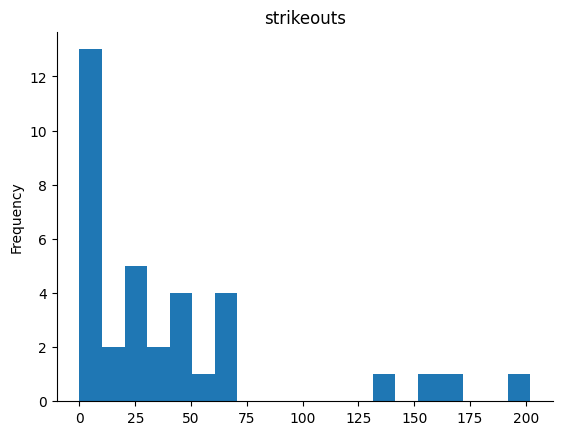

In [59]:
# @title strikeouts

from matplotlib import pyplot as plt
player_stats_df['strikeouts'].plot(kind='hist', bins=20, title='strikeouts')
plt.gca().spines[['top', 'right',]].set_visible(False)

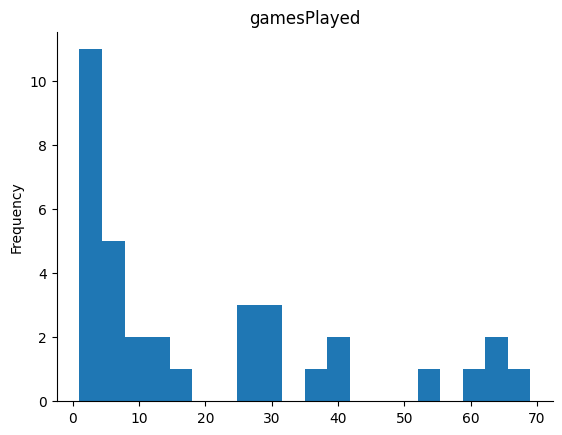

In [58]:
# @title gamesPlayed

from matplotlib import pyplot as plt
player_stats_df['gamesPlayed'].plot(kind='hist', bins=20, title='gamesPlayed')
plt.gca().spines[['top', 'right',]].set_visible(False)

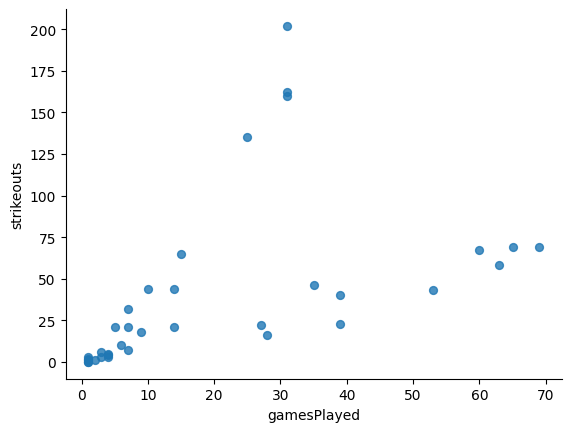

In [57]:
# @title gamesPlayed vs strikeouts

from matplotlib import pyplot as plt
player_stats_df.plot(kind='scatter', x='gamesPlayed', y='strikeouts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

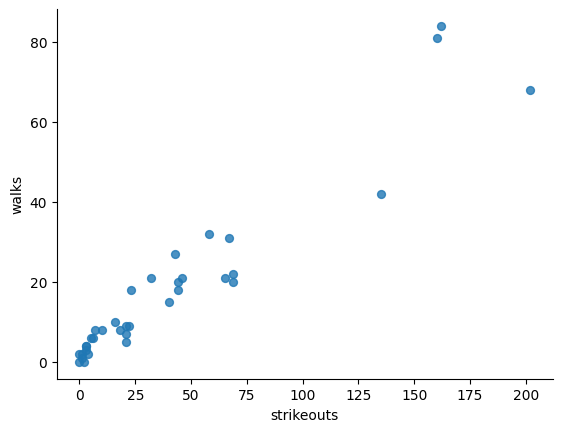

In [56]:
# @title strikeouts vs walks

from matplotlib import pyplot as plt
player_stats_df.plot(kind='scatter', x='strikeouts', y='walks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)